In [1]:
import pandas as pd

In [3]:
income = pd.read_csv("C:/Users/neera/Downloads/IT_Salary_Survey_2020_new (1).csv")

In [4]:
income.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [5]:
income.columns

Index(['Age', 'Gender', 'City', 'Position ', 'Total years of experience',
       'Seniority level', 'Your main technology / programming language',
       'Yearly_salary_in_EUR', 'Number of vacation days', 'Employment status',
       'Dontract duration', 'Main language at work', 'Company size',
       'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')

In [6]:
income.shape

(1253, 17)

In [7]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Age                                                                                                                      1226 non-null   float64
 1   Gender                                                                                                                   1243 non-null   object 
 2   City                                                                                                                     1253 non-null   object 
 3   Position                                                                                                                 1247 non-null   o

In [8]:
# checking null values in columns

income.isnull().sum()

Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Seniority level                                                                                                             12
Your main technology / programming language                                                                                127
Yearly_salary_in_EUR                                                                                           





Missing values are usually represented in the form of Nan or null or None in the dataset.

## **Missing value treatment**

Deleting the column with missing data 

In [9]:
((income.isnull().sum())/1253)*100

Age                                                                                                                         2.154828
Gender                                                                                                                      0.798085
City                                                                                                                        0.000000
Position                                                                                                                    0.478851
Total years of experience                                                                                                   1.276935
Seniority level                                                                                                             0.957702
Your main technology / programming language                                                                                10.135674
Yearly_salary_in_EUR                                                 


### <font color='red'> we can observe that 3 columns have high null value count </font>

## **Dropping column with high null value**

In [9]:
income.drop(['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Your main technology / programming language'], axis = 1, inplace = True)

In [10]:
income.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


### **Imputing missing value with median, mean or mode**

Age is quantitative column, so we have imputed missing age with median age

In [14]:
median_age = income['Age'].median()
income['Age'] = income['Age'].fillna(median_age)

In [15]:
median_age

32.0

Gender is categorical column, we will impute missing value with mode

In [16]:
income['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [17]:
mode_Gender = income['Gender'].mode().values[0]
income['Gender'] = income['Gender'].fillna(mode_Gender)

In [18]:
type(income['Gender'].mode())

pandas.core.series.Series

In [19]:
income['Gender'].mode().values[0]

'Male'

In [20]:
mode_Gender

'Male'

### **Deleting the row with missing data**

In [21]:
income.dropna(axis = 0,inplace = True) # axis = 0 will delete rows with null values

In [22]:
income.shape

(1139, 14)

In [23]:
income.isnull().sum() # we can observe that there is no missing value

Age                                                        0
Gender                                                     0
City                                                       0
Position                                                   0
Total years of experience                                  0
Seniority level                                            0
Yearly_salary_in_EUR                                       0
Number of vacation days                                    0
Employment status                                          0
Dontract duration                                          0
Main language at work                                      0
Company size                                               0
Company type                                               0
Have you lost your job due to the coronavirus outbreak?    0
dtype: int64

In [24]:
income.shape

(1139, 14)

## **Value count**

In [25]:
income['Gender'].value_counts() # we get the distribution of gender in dataset

Gender
Male       964
Female     174
Diverse      1
Name: count, dtype: int64

In [26]:
income['Gender'].value_counts(normalize= True) # Normalize = True to get the percentage of each category

Gender
Male       0.846356
Female     0.152766
Diverse    0.000878
Name: proportion, dtype: float64

In [27]:
income.describe()

,Age,Yearly_salary_in_EUR
count,1139.000000,1.139000e+03
mean,32.447761,5.103720e+05
std,5.456945,1.481314e+07
min,20.000000,1.000100e+04
25%,29.000000,5.890000e+04
50%,32.000000,7.000000e+04
75%,35.000000,8.000000e+04
max,66.000000,5.000000e+08


In [28]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Age                                                      1139 non-null   float64
 1   Gender                                                   1139 non-null   object 
 2   City                                                     1139 non-null   object 
 3   Position                                                 1139 non-null   object 
 4   Total years of experience                                1139 non-null   object 
 5   Seniority level                                          1139 non-null   object 
 6   Yearly_salary_in_EUR                                     1139 non-null   float64
 7   Number of vacation days                                  1139 non-null   object 
 8   Employment status                

In [29]:
income.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


### **changing datatype of columns**

In [30]:
income['Age'] = income['Age'].astype('int32')

In [31]:
income.info() # we can observe that Age datatype has been changed

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Age                                                      1139 non-null   int32  
 1   Gender                                                   1139 non-null   object 
 2   City                                                     1139 non-null   object 
 3   Position                                                 1139 non-null   object 
 4   Total years of experience                                1139 non-null   object 
 5   Seniority level                                          1139 non-null   object 
 6   Yearly_salary_in_EUR                                     1139 non-null   float64
 7   Number of vacation days                                  1139 non-null   object 
 8   Employment status                

In [32]:
income['Total years of experience'] = income['Total years of experience'].astype('float64')

ValueError: could not convert string to float: '1,5'

##### It throws error because there is some value ```'1,5'``` in our data

In [33]:
# Replace this 1,5 with 1.5

income.replace({'1,5':1.5},inplace = True) #old value: new value

In [34]:
income['Total years of experience'].astype('float64')

ValueError: could not convert string to float: '1 (as QA Engineer) / 11 in total'

In [35]:
income['Total years of experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', '14', '11',
       '18', '30', '13', '10', '3', '40', '26', '9', '19', '20', '5.5',
       '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5', '2.5', '28',
       '29', '23', 1.5, '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '3.5', 'less than year'], dtype=object)

In [37]:

income['Total years of experience'] = income['Total years of experience'].replace({'1 (as QA Engineer) / 11 in total':11,'2,5':2.5,'15, thereof 8 as CTO':15,'less than year':1})

### **changing datatype of multiple columns**

In [38]:
income[['Total years of experience','Yearly_salary_in_EUR']] = income[['Total years of experience','Yearly_salary_in_EUR']].astype('float64')

In [39]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Age                                                      1139 non-null   int32  
 1   Gender                                                   1139 non-null   object 
 2   City                                                     1139 non-null   object 
 3   Position                                                 1139 non-null   object 
 4   Total years of experience                                1139 non-null   float64
 5   Seniority level                                          1139 non-null   object 
 6   Yearly_salary_in_EUR                                     1139 non-null   float64
 7   Number of vacation days                                  1139 non-null   object 
 8   Employment status                

In [40]:
income.describe()

,Age,Total years of experience,Yearly_salary_in_EUR
count,1139.000000,1139.000000,1.139000e+03
mean,32.447761,8.753819,5.103720e+05
std,5.456945,5.264986,1.481314e+07
min,20.000000,0.000000,1.000100e+04
25%,29.000000,5.000000,5.890000e+04
50%,32.000000,8.000000,7.000000e+04
75%,35.000000,12.000000,8.000000e+04
max,66.000000,40.000000,5.000000e+08


## **Types of charts**

In [41]:
import matplotlib.pyplot as plt

### Bar graph

A bar chart is utilized for comparing metric values across several subgroups of your data. A bar chart allows us to view the most prevalent or highest groups as well as how each group stacks up against the others.

In [42]:
# we will calculate the mean of Age by Company Size

Company_size_group = income[['Company size','Age']].groupby('Company size').Age.mean()
Company_size_group

Company size
1000+       32.334928
101-1000    32.673854
51-100      33.210145
Nov-50      31.895062
up to 10    31.400000
Name: Age, dtype: float64

In [43]:
type(Company_size_group)

pandas.core.series.Series

In [44]:
Company_size_group = pd.DataFrame(Company_size_group) # converting it to dataframe

In [45]:
Company_size_group # we can observe that, company size is in index

,Age
Company size,
1000+,32.334928
101-1000,32.673854
51-100,33.210145
Nov-50,31.895062
up to 10,31.400000


In [46]:
Company_size_group.reset_index(inplace = True) # reset the index

In [47]:
Company_size_group

,Company size,Age
0,1000+,32.334928
1,101-1000,32.673854
2,51-100,33.210145
3,Nov-50,31.895062
4,up to 10,31.400000


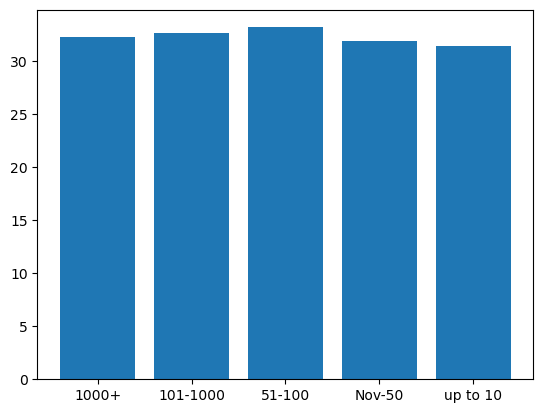

In [48]:
plt.bar(Company_size_group['Company size'],Company_size_group['Age'])
plt.show()

## Ques

create a bar graph for median of Age by Employment status 

In [49]:
employment_status=income[['Age','Employment status']].groupby('Employment status').Age.median()

employment_status

Employment status
Founder                                                                35.0
Full-time employee                                                     32.0
Part-time employee                                                     36.0
Self-employed (freelancer)                                             32.0
Werkstudent                                                            24.0
Working Student                                                        24.0
full-time, but 32 hours per week (it was my request, I'm a student)    33.0
working student                                                        25.0
Name: Age, dtype: float64

In [50]:
employment_status=pd.DataFrame(employment_status)
employment_status

,Age
Employment status,
Founder,35.0
Full-time employee,32.0
Part-time employee,36.0
Self-employed (freelancer),32.0
Werkstudent,24.0
Working Student,24.0
"full-time, but 32 hours per week (it was my request, I'm a student)",33.0
working student,25.0


In [51]:
employment_status.reset_index(inplace=True)


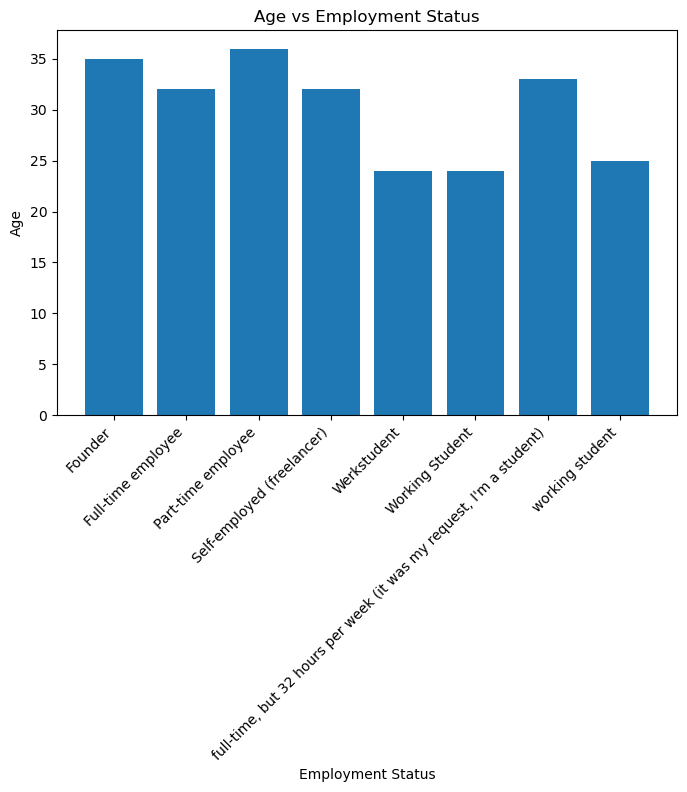

In [55]:
plt.figure(figsize=(8,5))   # graph ko wide banaya

plt.bar(employment_status['Employment status'],employment_status['Age'])

plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.title('Age vs Employment Status')

plt.xticks(rotation=45, ha='right')  # labels ko ghumaya
                   
plt.show()

## Scatter Plot

The values for two distinct numerical variables are represented by dots in a scatter plot, also known as a scatter chart or scatter graph. The values for each individual data point are indicated by the position of each dot on the horizontal and vertical axes. Relationships between variables are observed through the use of scatter plots.

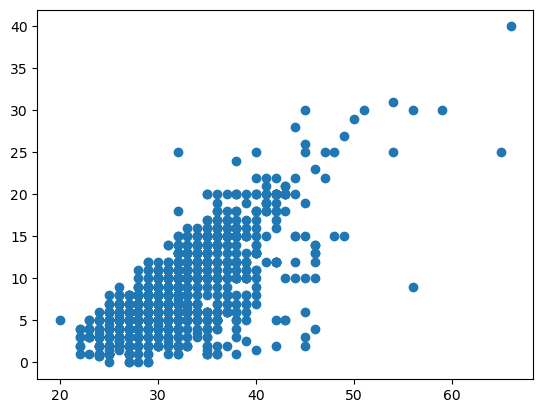

In [56]:




plt.scatter(income['Age'],income['Total years of experience'])
plt.show()

## Ques 
<br> Create a scatter plot between Total years of experience and salary

In [57]:
income.columns

Index(['Age', 'Gender', 'City', 'Position ', 'Total years of experience',
       'Seniority level', 'Yearly_salary_in_EUR', 'Number of vacation days',
       'Employment status', 'Dontract duration', 'Main language at work',
       'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?'],
      dtype='object')

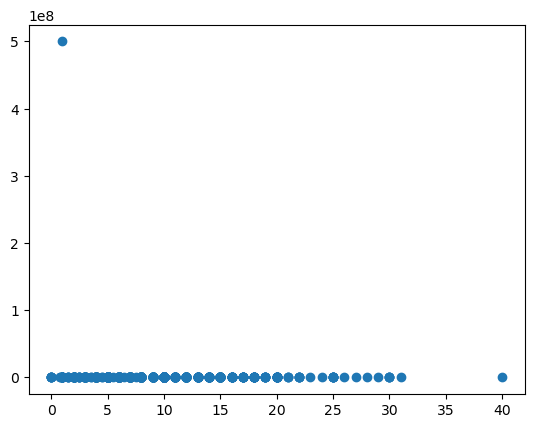

In [58]:


plt.scatter(income['Total years of experience'],income['Yearly_salary_in_EUR'])
plt.show()

## Line graph
A line graph plots data points on a grid and connects them with straight lines. The horizontal x-axis often shows time or categories, while the vertical y-axis shows values

In [63]:
sales = pd.DataFrame({'Date' : ['01-05-2024','02-05-2024','03-05-2024','04-05-2024','05-05-2024'], 'Revenue': [1000,800,700,1987,2000]})



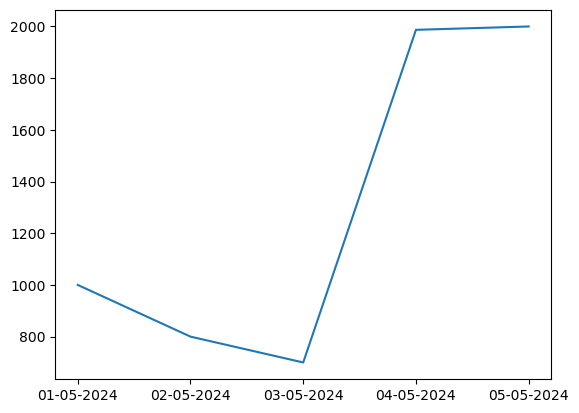

In [64]:
plt.plot(sales['Date'],sales['Revenue'])
plt.show()

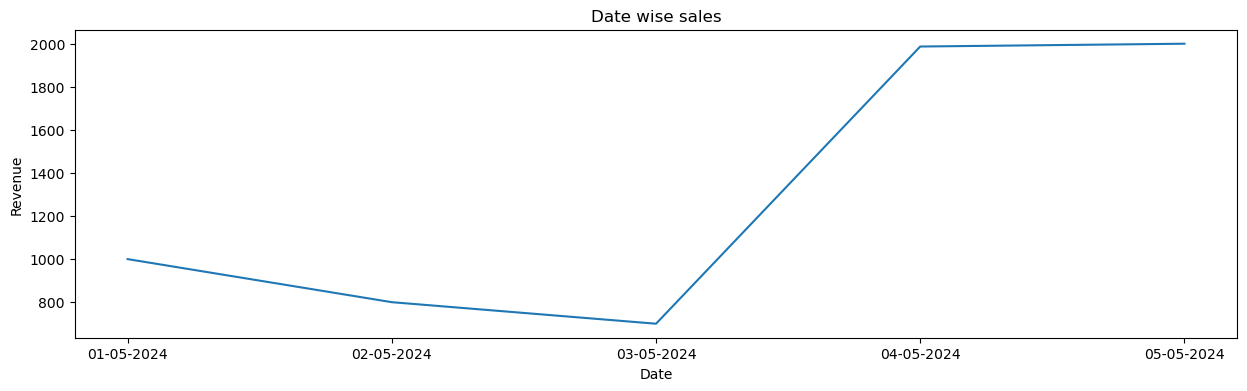

In [65]:
plt.figure(figsize = (15,4)) # allow us to give figure size of graph
plt.plot(sales['Date'],sales['Revenue'])
plt.title('Date wise sales') # to give title of chart
plt.xlabel('Date') # to give name to x axis
plt.ylabel('Revenue') # to give name to y axis
plt.show()

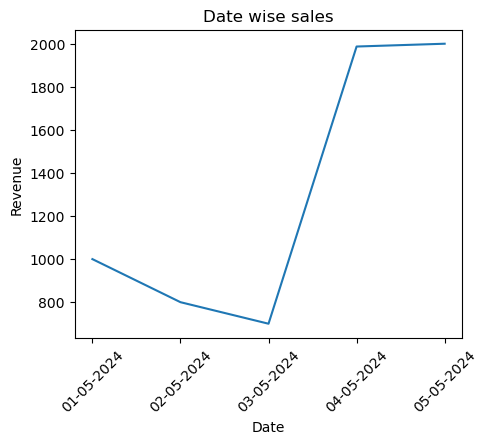

In [66]:
# we can rotate the x labels for better presentation

plt.figure(figsize = (5,4)) 
plt.plot(sales['Date'],sales['Revenue'])
plt.title('Date wise sales') 
plt.xlabel('Date') 
plt.ylabel('Revenue') 
plt.xticks(rotation= 45) # it will change the inclination of labels

plt.show()


### Histogram
A histogram is a type of statistical graph in which the distribution of a continuous dataset is represented by plotted bars, each of which stands for a distinct category or class interval.

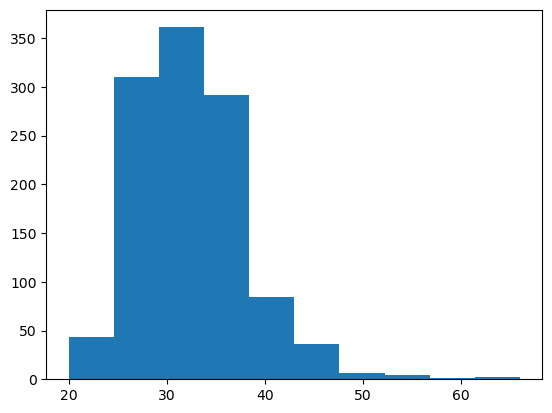

In [67]:
plt.hist(income['Age'])
plt.show()

# we can observe maximum people lie between 30 to 40 years of age

#### ```bin``` defines the number of groups in which column will be divided

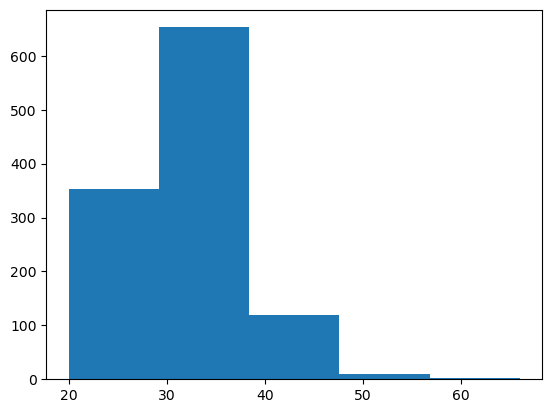

In [68]:
plt.hist(income['Age'], bins = 5)
plt.show()



#### we can provide bin edges for eg: 20 to 35, 36 to 55 and 55 to 80

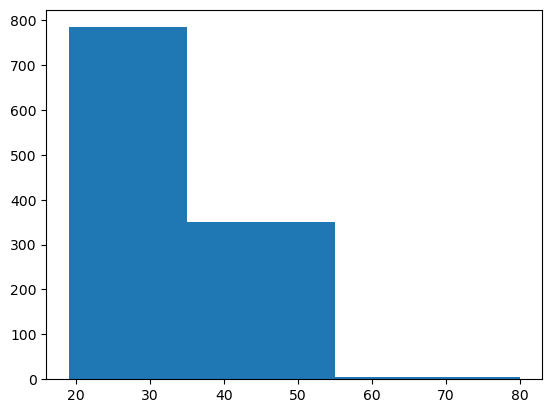

In [69]:
plt.hist(income['Age'], bins = [19,35,55,80]) 
plt.show()



### Density in histogram

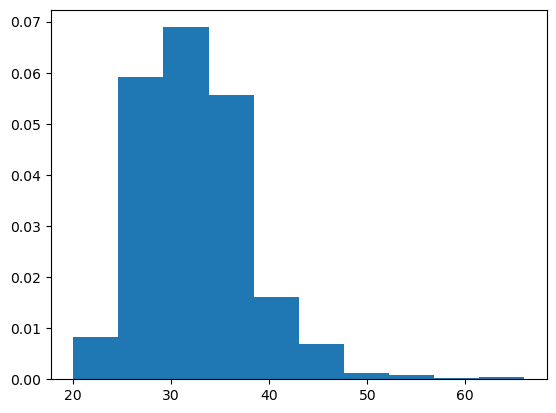

In [70]:
plt.hist(income['Age'], density = True) 
plt.show()



``True``, draw and return a probability density: each bin
    will display the bin's raw count divided by the total number of
    counts *and the bin width*

### Ques
<br> apply bin and density parameter in below histogram

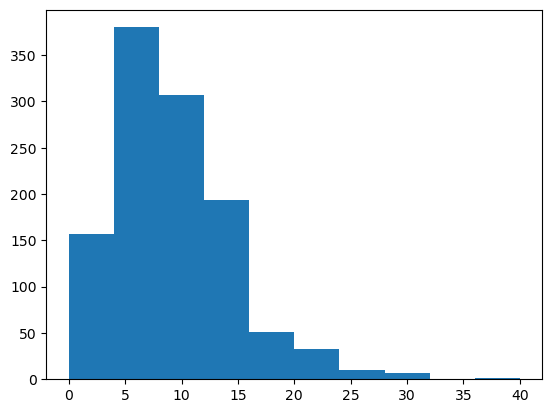

In [71]:
plt.hist(income['Total years of experience'])
plt.show()

# we can observe that maximum years of experience lie between 5 to 10 years of experience

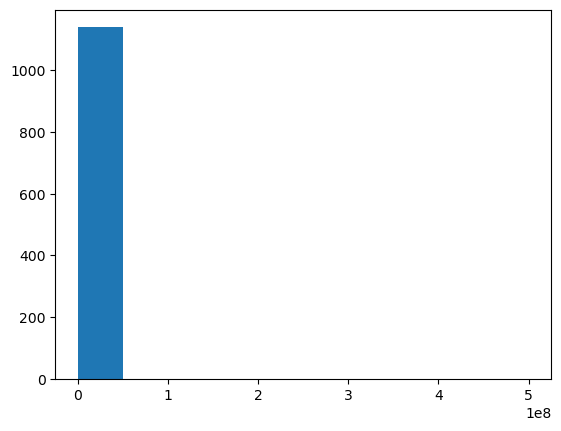

In [72]:
plt.hist(income['Yearly_salary_in_EUR'])
plt.show()

# there is something fishy in this graph, this graph is quite narrow.
# look at the x-axis, there is numbers denoted in le8. it seems that there is very high value present in data

In [73]:
income['Yearly_salary_in_EUR'].max() # look at the max value, this is creating deviation in data

500000000.0

In [74]:
income['Yearly_salary_in_EUR'].median()

70000.0

In [75]:
income['Yearly_salary_in_EUR'].mean()

np.float64(510371.9587357331)

In [76]:
income[income['Yearly_salary_in_EUR']== 500000000.0]

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
853,29,Female,Cologne,ML Engineer,1.0,Middle,500000000.0,99,Full-time employee,Unlimited contract,English,up to 10,Startup,No


In [77]:
income_1 = income[income['Yearly_salary_in_EUR'] < 500000000.0] # removing maximum value, it is outlier in our dataset

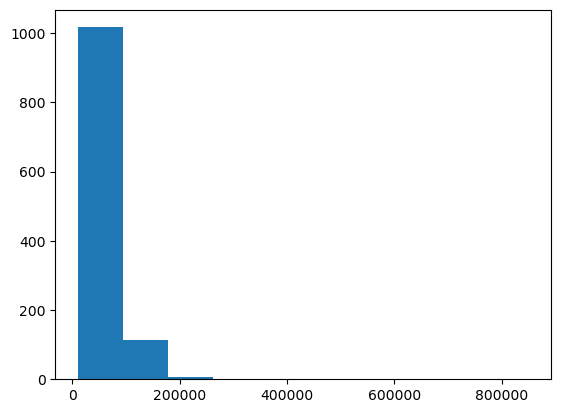

In [78]:
plt.hist(income_1['Yearly_salary_in_EUR'])
plt.show()



In [79]:
income_1['Yearly_salary_in_EUR'].max() # look at the max value, this is creating deviation in data

850000.0






## **EDA ( Exploratory Data Analysis)**


Exploratory Data Analysis (EDA) is a crucial step in data analysis where the primary goal is to understand the data and its underlying structure, patterns, and relationships. It involves techniques to summarize the main characteristics of the data, often employing graphical and statistical methods.

<br>There are several types of EDA techniques that can be employed:

<br>**Univariate Analysis:** This involves the analysis of a single variable. Techniques include histograms, box plots, bar charts, and summary statistics like mean, median, mode, and measures of dispersion.
<br>**Bivariate Analysis:** Involves the analysis of two variables to determine if there is a relationship between them. Scatter plots, correlation analysis.
<br>**Multivariate Analysis:** This extends beyond bivariate analysis to explore relationships between multiple variables simultaneously. Techniques like heatmaps, pair plots, and clustering methods fall under this category.

## **Univariate Analysis**

### Countplot
The seaborn.countplot() method is used to display the count of observations in each categorical bin as bars.
this is part of univariate because we are considering only variable for analysis
 

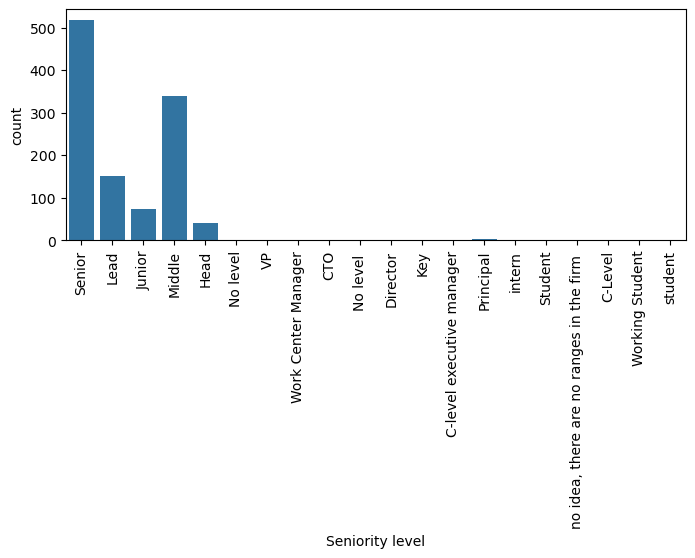

In [80]:
import seaborn as sns
plt.figure(figsize = (8,3))
sns.countplot(x = 'Seniority level',data= income)
plt.xticks(rotation = 90)
plt.show()

# it showcase the counts of each category in Seniority level column

**Observation** Senior and middle Seniority level people have participated actively in our survey

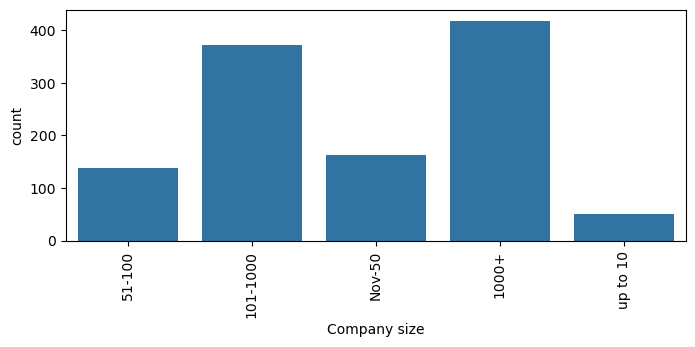

In [81]:
import seaborn as sns
plt.figure(figsize = (8,3))
sns.countplot(x = 'Company size',data= income)
plt.xticks(rotation = 90)
plt.show()



**Observation** Number of employee from 1000+ company size is maximum in our dataset, ```Nov-50``` is undesired value

## Ques

Replace the 'Nov-50' value in above column with 11-50.

In [82]:
income.replace({"Nov-50":"11-50"},inplace=True)

## Distplot

<span style='color :Orange' > **seaborn.distplot**  </span> combines a histogram with a kernel density estimate (KDE) plot. It provides a comprehensive view of the data distribution by displaying both the frequency distribution (histogram) and the smooth, continuous estimate of the probability density function (KDE). This makes it suitable for exploring the overall shape of the distribution.

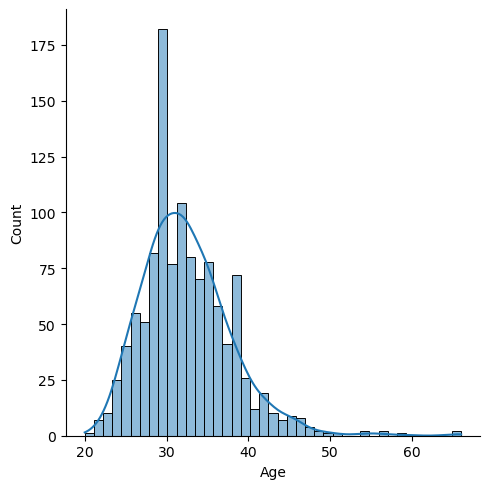

In [83]:
sns.displot(income['Age'], kde = True) # this kde will help in understanding the shape of histogram
plt.show()

**Observation** Peak of graph lies around 32

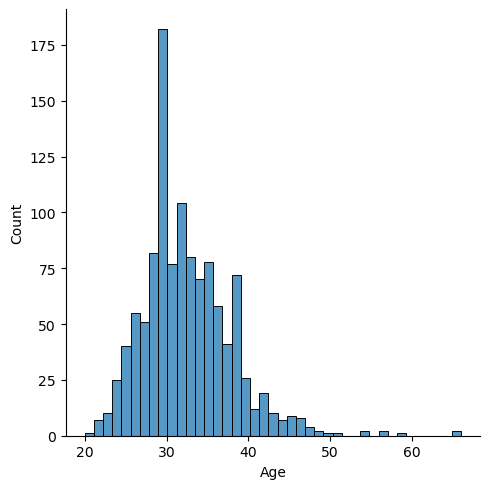

In [84]:
sns.displot(income['Age']) # when kde is false then we won't get the kde line
plt.show()

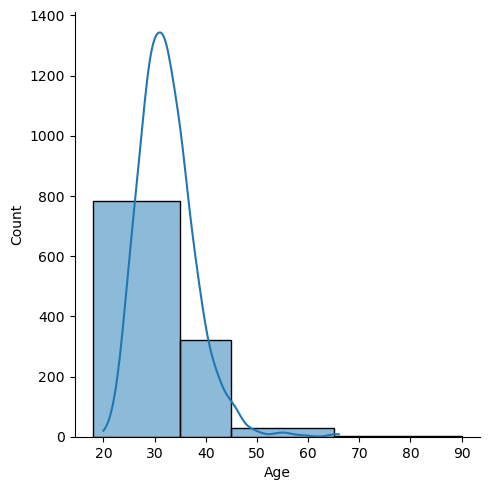

In [85]:
sns.displot(income['Age'], kde = True, bins = [18,35,45,65,90]) # bin range can be set
plt.show()

## kdeplot

On the other hand, <span style='color :Green' > **seaborn.kdeplot**  </span> (Kernel density estimation) is primarily focused on generating the KDE plot alone. It provides a smooth representation of the underlying distribution, which is useful for gaining insights into the data's continuous probability density. It's particularly valuable when you want to emphasize the smoothness of the distribution without the binning that a histogram introduces.


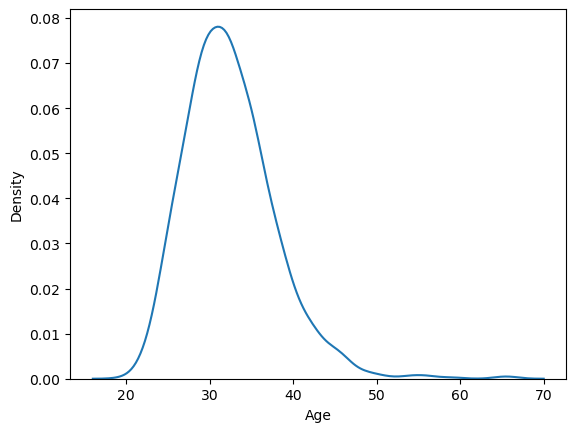

In [86]:
sns.kdeplot(income['Age']) # it will showcase only kde line
plt.show()

## Ques 

Create displot and kdeplot for Total years of experience column









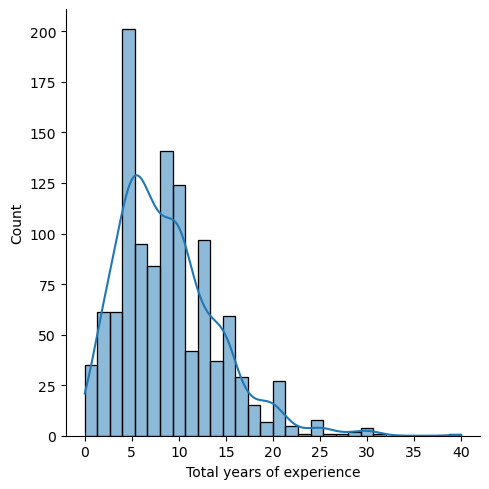

In [87]:
sns.displot(income['Total years of experience'], kde = True) 
plt.show()


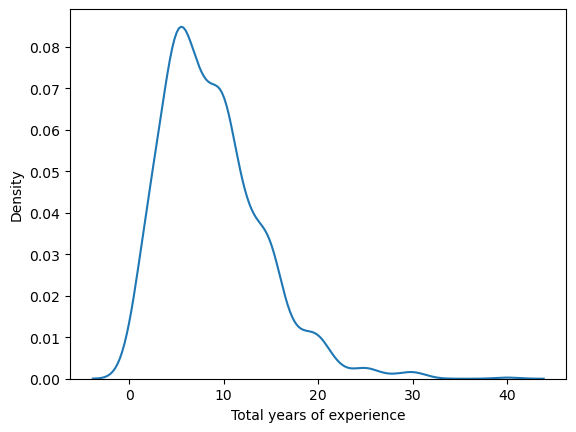

In [88]:
sns.kdeplot(income['Total years of experience']) # it will showcase only kde line
plt.show()


##### **Observation** people of 5 years experience are high, also we can observe 10 years experience people more

## Boxplot


is a visual representation of a dataset's distribution. It displays the median (middle value) as a line inside a rectangular "box." The box's lower and upper edges represent the 25th and 75th percentiles, showing the interquartile range (middle 50% of data). Lines, or "whiskers," extend from the box to show the data's spread, excluding outliers (unusually high or low values). Outliers are displayed as individual points 

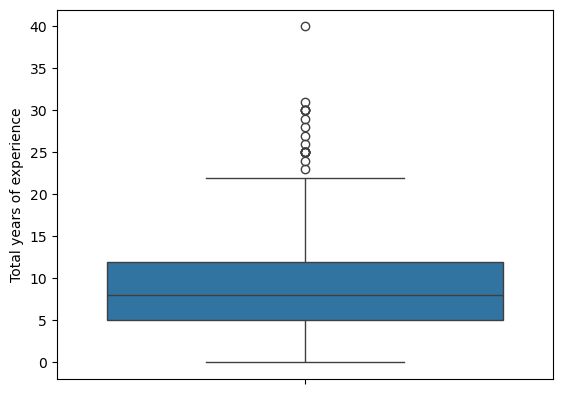

In [89]:
sns.boxplot(income['Total years of experience'])
plt.show()

**observation:** median is around 7 years of experience.
<br> 75% percentile lies around 12 years and 25 % percentile is around 5 years
<br> Min exp is 0 years
<br> max experience is around 22 years and beyond that is considered as expectional case or outliers

## Ques 

create a boxplot for age

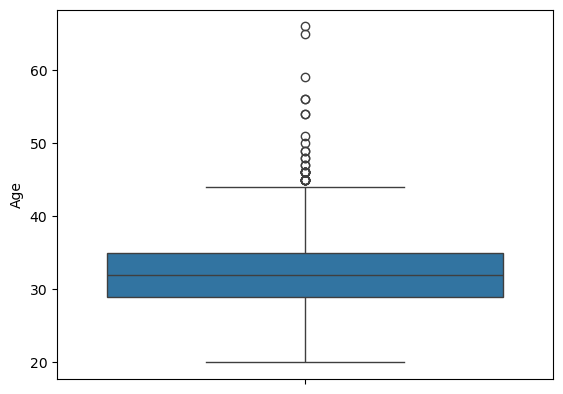

In [90]:
sns.boxplot(income['Age'])
plt.show()

## Pie chart
A pie chart is a type of graph that shows how a whole is divided into parts.

The chart is shaped like a circle.

Each slice of the circle represents a category.

The size of each slice shows how large that category is compared to the total (usually as a percentage).

In [91]:
income['Company size'].value_counts()

Company size
1000+       418
101-1000    371
11-50       162
51-100      138
up to 10     50
Name: count, dtype: int64

In [92]:
type(income['Company size'].value_counts())

pandas.core.series.Series

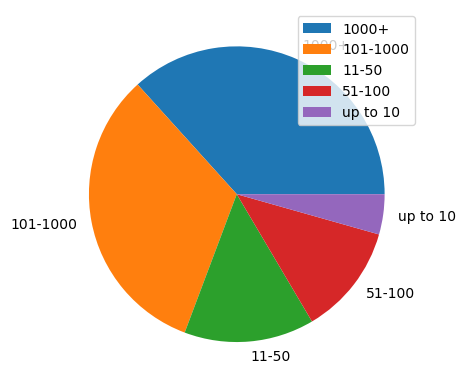

In [93]:
plt.pie(income['Company size'].value_counts(),labels= income['Company size'].value_counts().index )
plt.legend() # it will add label of category with it's specific colour
plt.show()

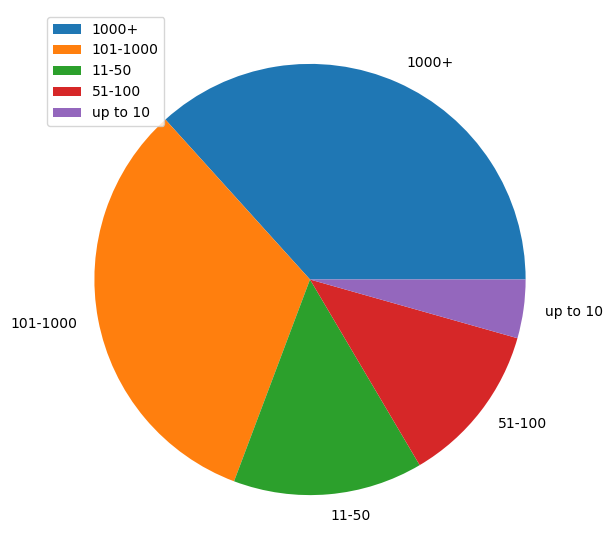

In [94]:
plt.figure(figsize = (8,7))
plt.pie(income['Company size'].value_counts(),labels= income['Company size'].value_counts().index )
plt.legend(loc = 'upper left') # we can decide location of legends
plt.show()

## **Bivariate analysis**

#### It involves analysis of 2 variables toghether

In [95]:
income.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26,Male,Munich,Software Engineer,5.0,Senior,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26,Male,Berlin,Backend Developer,7.0,Senior,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29,Male,Berlin,Software Engineer,12.0,Lead,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37,Male,Berlin,Backend Developer,17.0,Senior,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


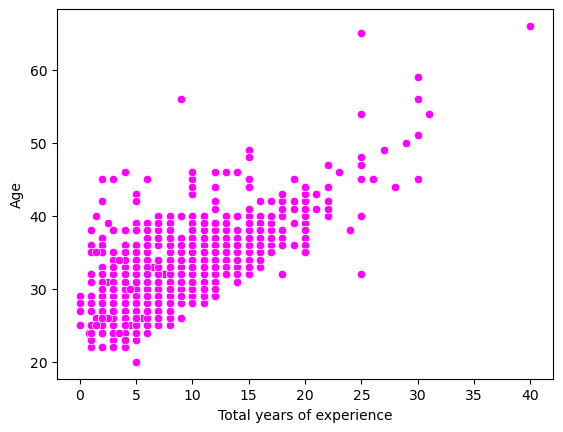

In [96]:

sns.scatterplot(x='Total years of experience',y='Age',data=income,color='magenta')
plt.show()

In [97]:
## Boxplot for continous variable with respect to each category 

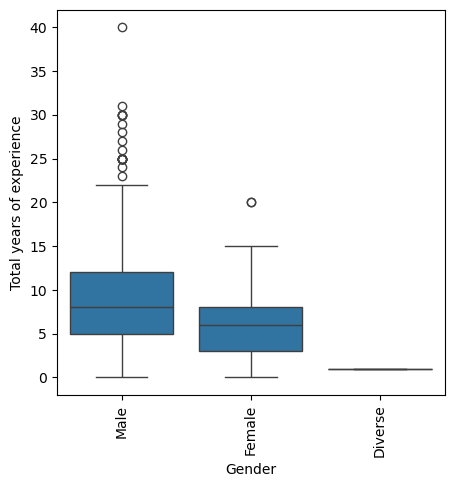

In [98]:
plt.figure(figsize=(5,5))
sns.boxplot(x ='Gender',y='Total years of experience',data=income)  
plt.xticks(rotation=90)
plt.show()

**Observation**: total years of experience is analysed with respect to each category in gender column.

## Ques 

create a box plot for seniority level and age


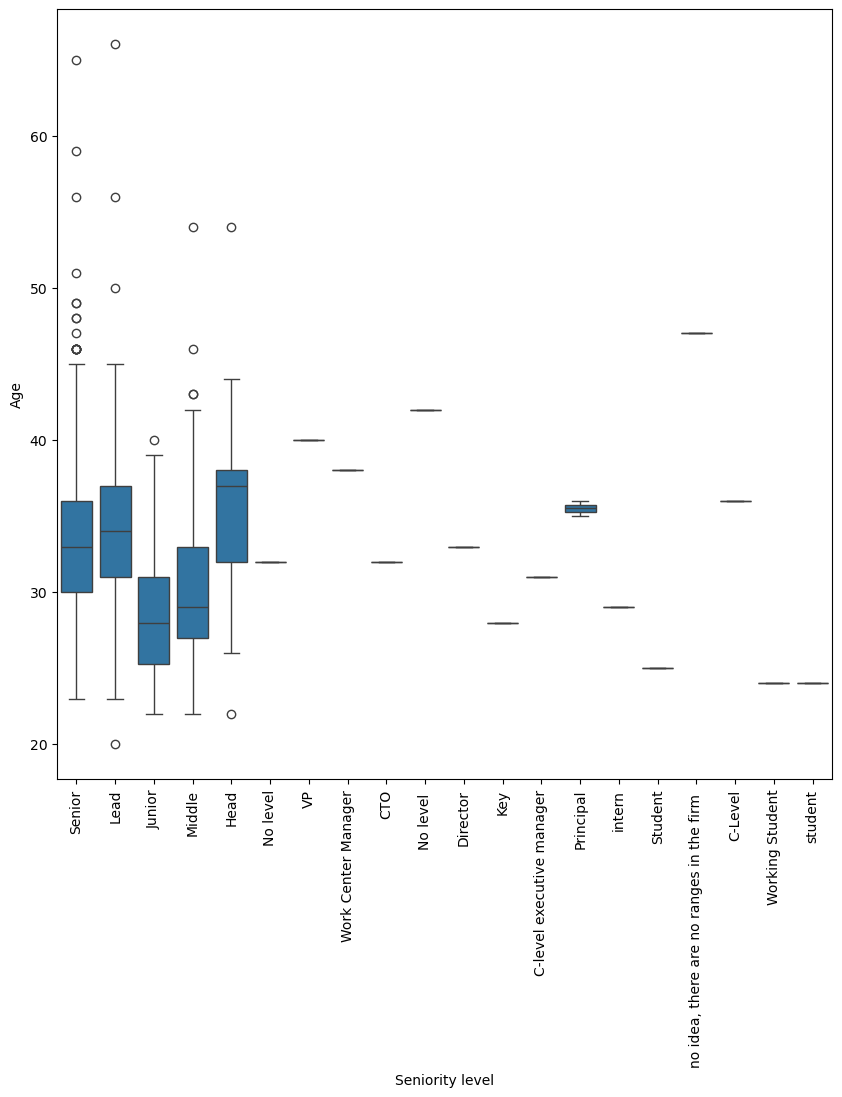

In [99]:
plt.figure(figsize=(10,10))
sns.boxplot(x ='Seniority level',y='Age',data=income) 
plt.xticks(rotation=90)
plt.show()

## Heatmap

In [100]:
income.corr(numeric_only = True) # value lie between -1 to 1.

,Age,Total years of experience,Yearly_salary_in_EUR
Age,1.000000,0.715655,-0.018295
Total years of experience,0.715655,1.000000,-0.042999
Yearly_salary_in_EUR,-0.018295,-0.042999,1.000000


In [101]:
# It helps in identifying the relation between 2 features, if value tends to 1 or -1 then we have high correlation

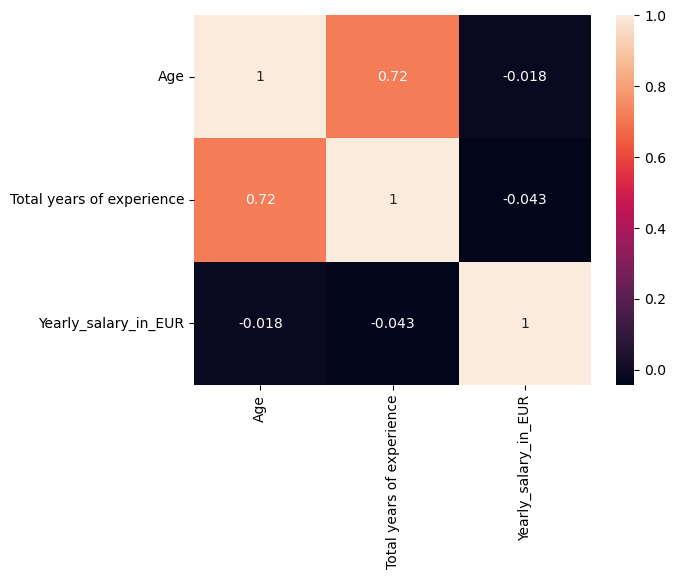

In [102]:
sns.heatmap(income.corr(numeric_only = True) ,annot=True)
plt.show()

## Strip plot

It is used to draw a scatter plot based on the category, on one axis there will be categorical column and on another it is continous

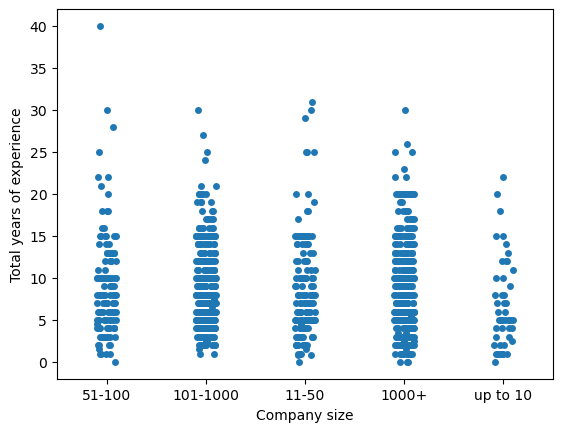

In [103]:
sns.stripplot(data = income, x = 'Company size', y = 'Total years of experience')
plt.show()

## Ques

draw stripplot for Employment status and Total years of experience

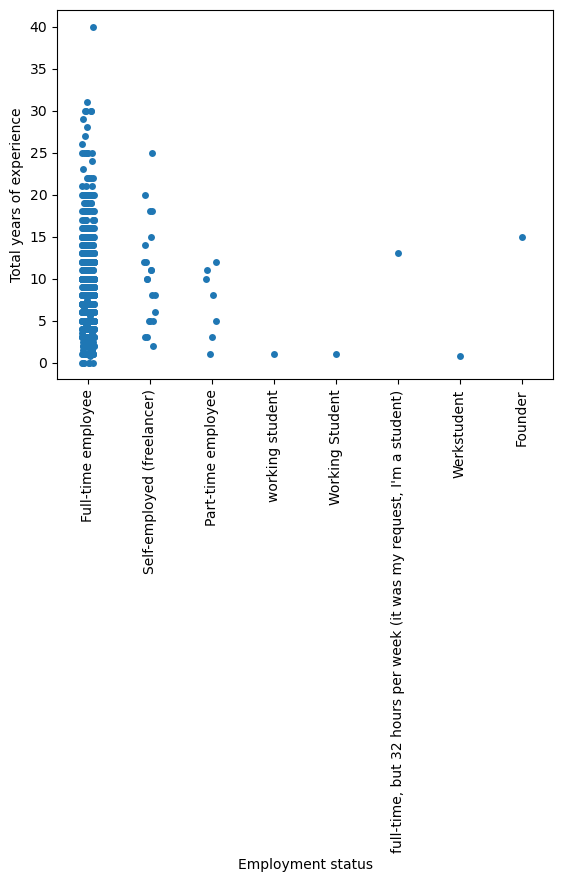

In [104]:




sns.stripplot(data = income, x = 'Employment status', y = 'Total years of experience')
plt.xticks(rotation = 90)
plt.show()

## Swarm plot

The swarm-plot automatically spreads out the variable's data points to avoid overlap, resulting in a more visually appealing data summary.

C:\Users\neera\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\neera\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\neera\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\neera\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\neera\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.9% of the points c

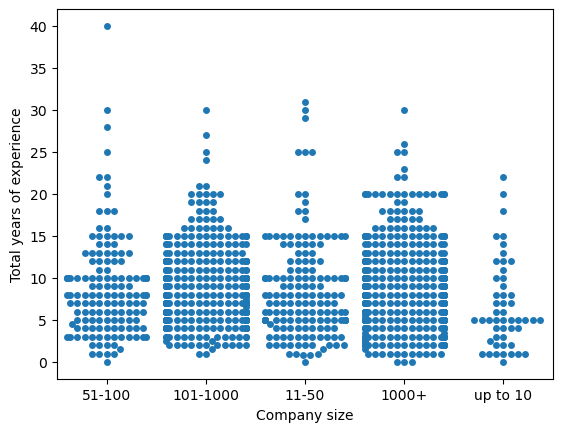

In [105]:
sns.swarmplot(data = income, x = 'Company size', y = 'Total years of experience')
plt.show()

## **Multivariate analysis**

It involves analysis of 2 or more variables together


### Concept of Hue

  <span style='color :Purple' > Hue </span>
is like a color-coding tool that helps you group and differentiate data points in your plots.  Hue lets you assign a unique color to each gender type, making it easier to see patterns and distinctions in your data at a glance. It's like giving each category its own special color on your graph. 

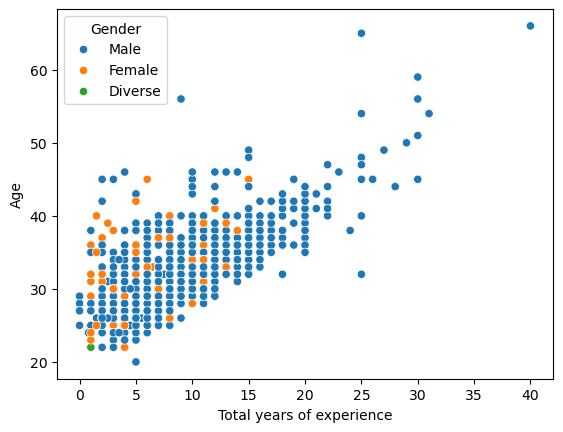

In [106]:

sns.scatterplot(x='Total years of experience',y='Age',data=income,hue = 'Gender')
plt.show()

**Observation:** Age, Total years of experience and Gender are analysed together in one graph using hue

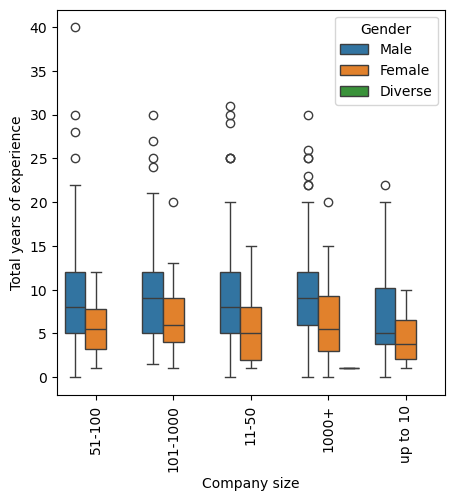

In [107]:
plt.figure(figsize=(5,5))
sns.boxplot(x ='Company size',y='Total years of experience', hue = 'Gender', data=income) 
plt.xticks(rotation=90)
plt.show()

## **Analyzing 3 or more variables with respect to each other**

#### lmplot

 Seaborn has a method called lmplot that may be used to make a scatter plot with a linear regression line (the "lm" stands for linear model). It lets you see the association between two variables as well as the fitted regression line; it's basically a combination of  a scatter plot and a regression plot.

[]

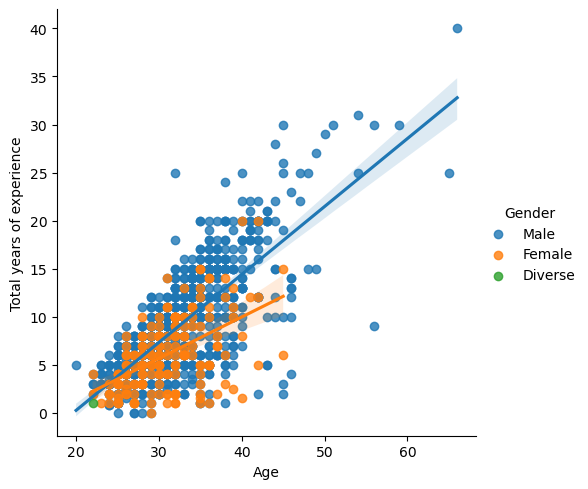

In [108]:
sns.lmplot(income,x ='Age',y='Total years of experience', hue = 'Gender', fit_reg=True) 
# fit_reg will allow to create regression line
plt.plot()

```lmplot will create number of graphs in grid (row, column). if you have selected any column for row then each category of that column will create their respective visuals. for eg: In the above graph, you have selected 'company size' in row then each row will create graph of category in this column. ```

[]

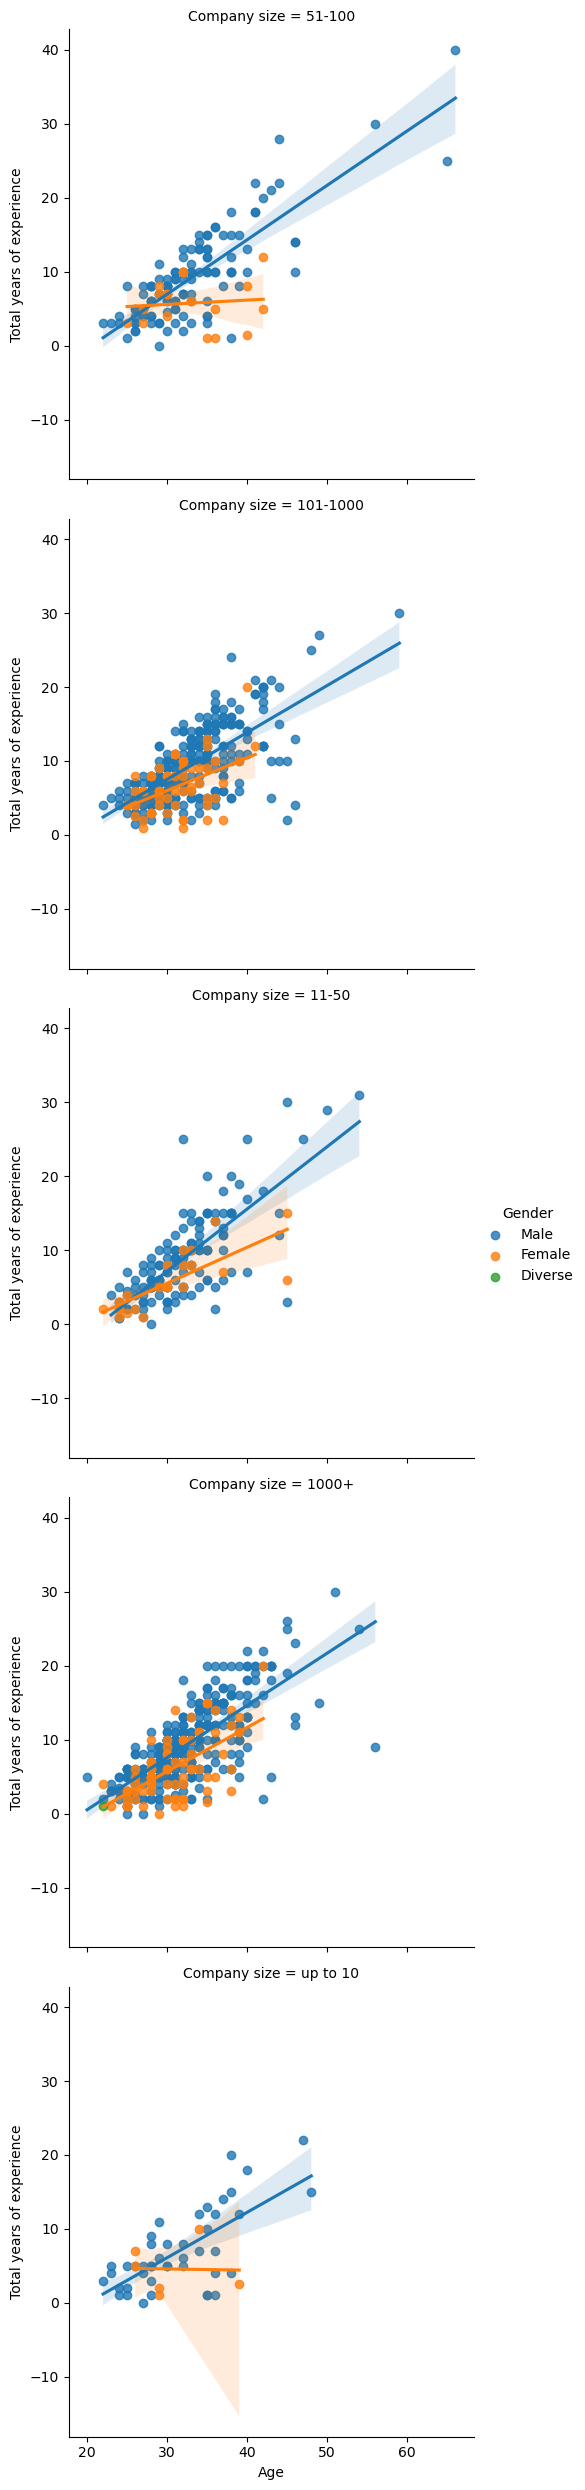

In [109]:

sns.lmplot(income,x ='Age',y='Total years of experience', hue = 'Gender',row= 'Company size',fit_reg=True)
plt.plot()

[]

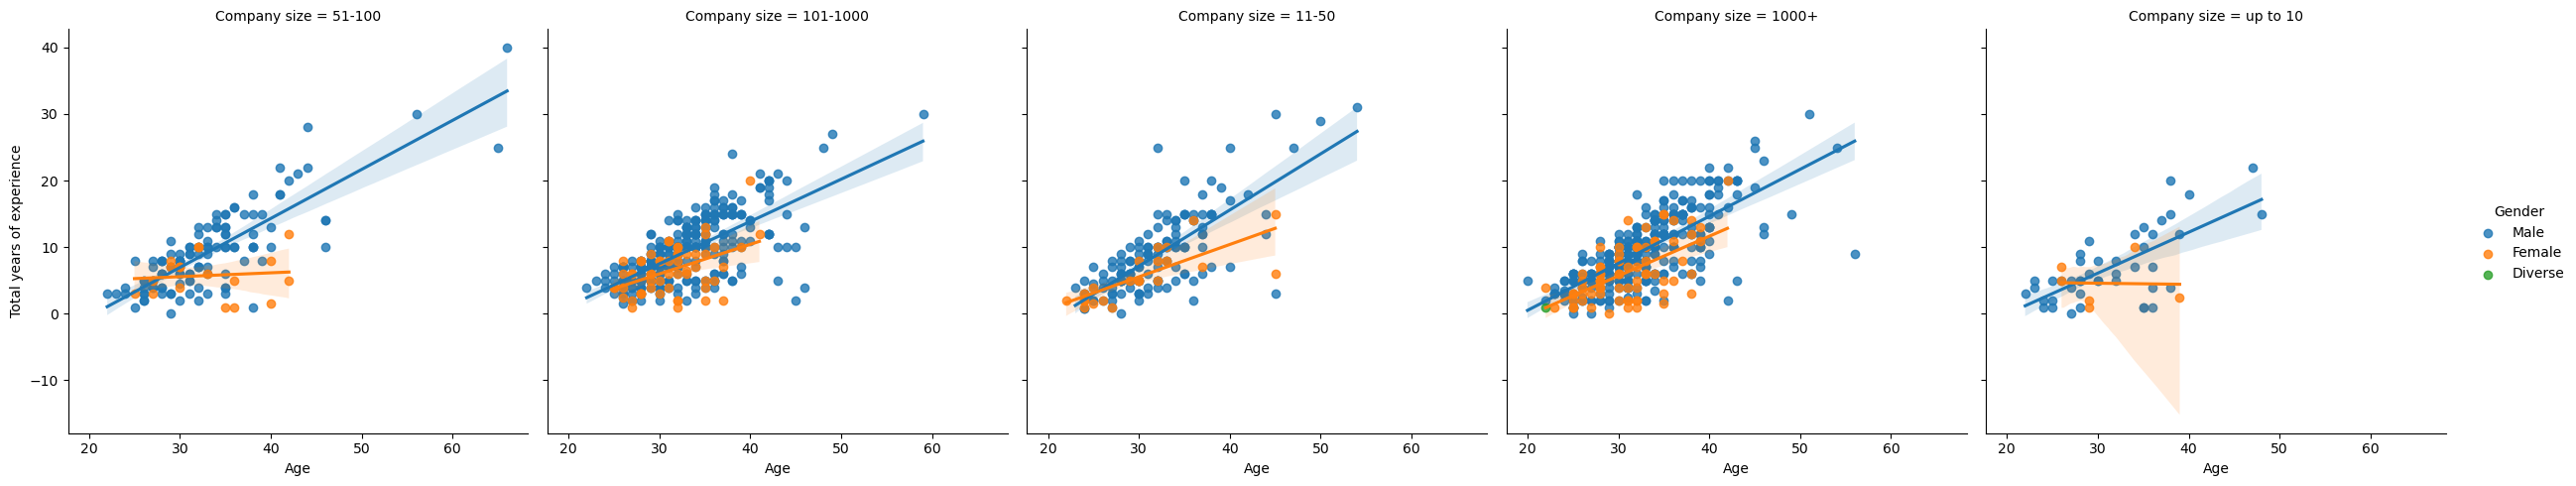

In [110]:
# column 

sns.lmplot(income,x ='Age',y='Total years of experience', hue = 'Gender',col= 'Company size',fit_reg=True)
plt.plot()

**observation:** 
<br> Overall Mean of experience for Male is slightly more than female.
<br> upward trend for male is more as compared to female

[]

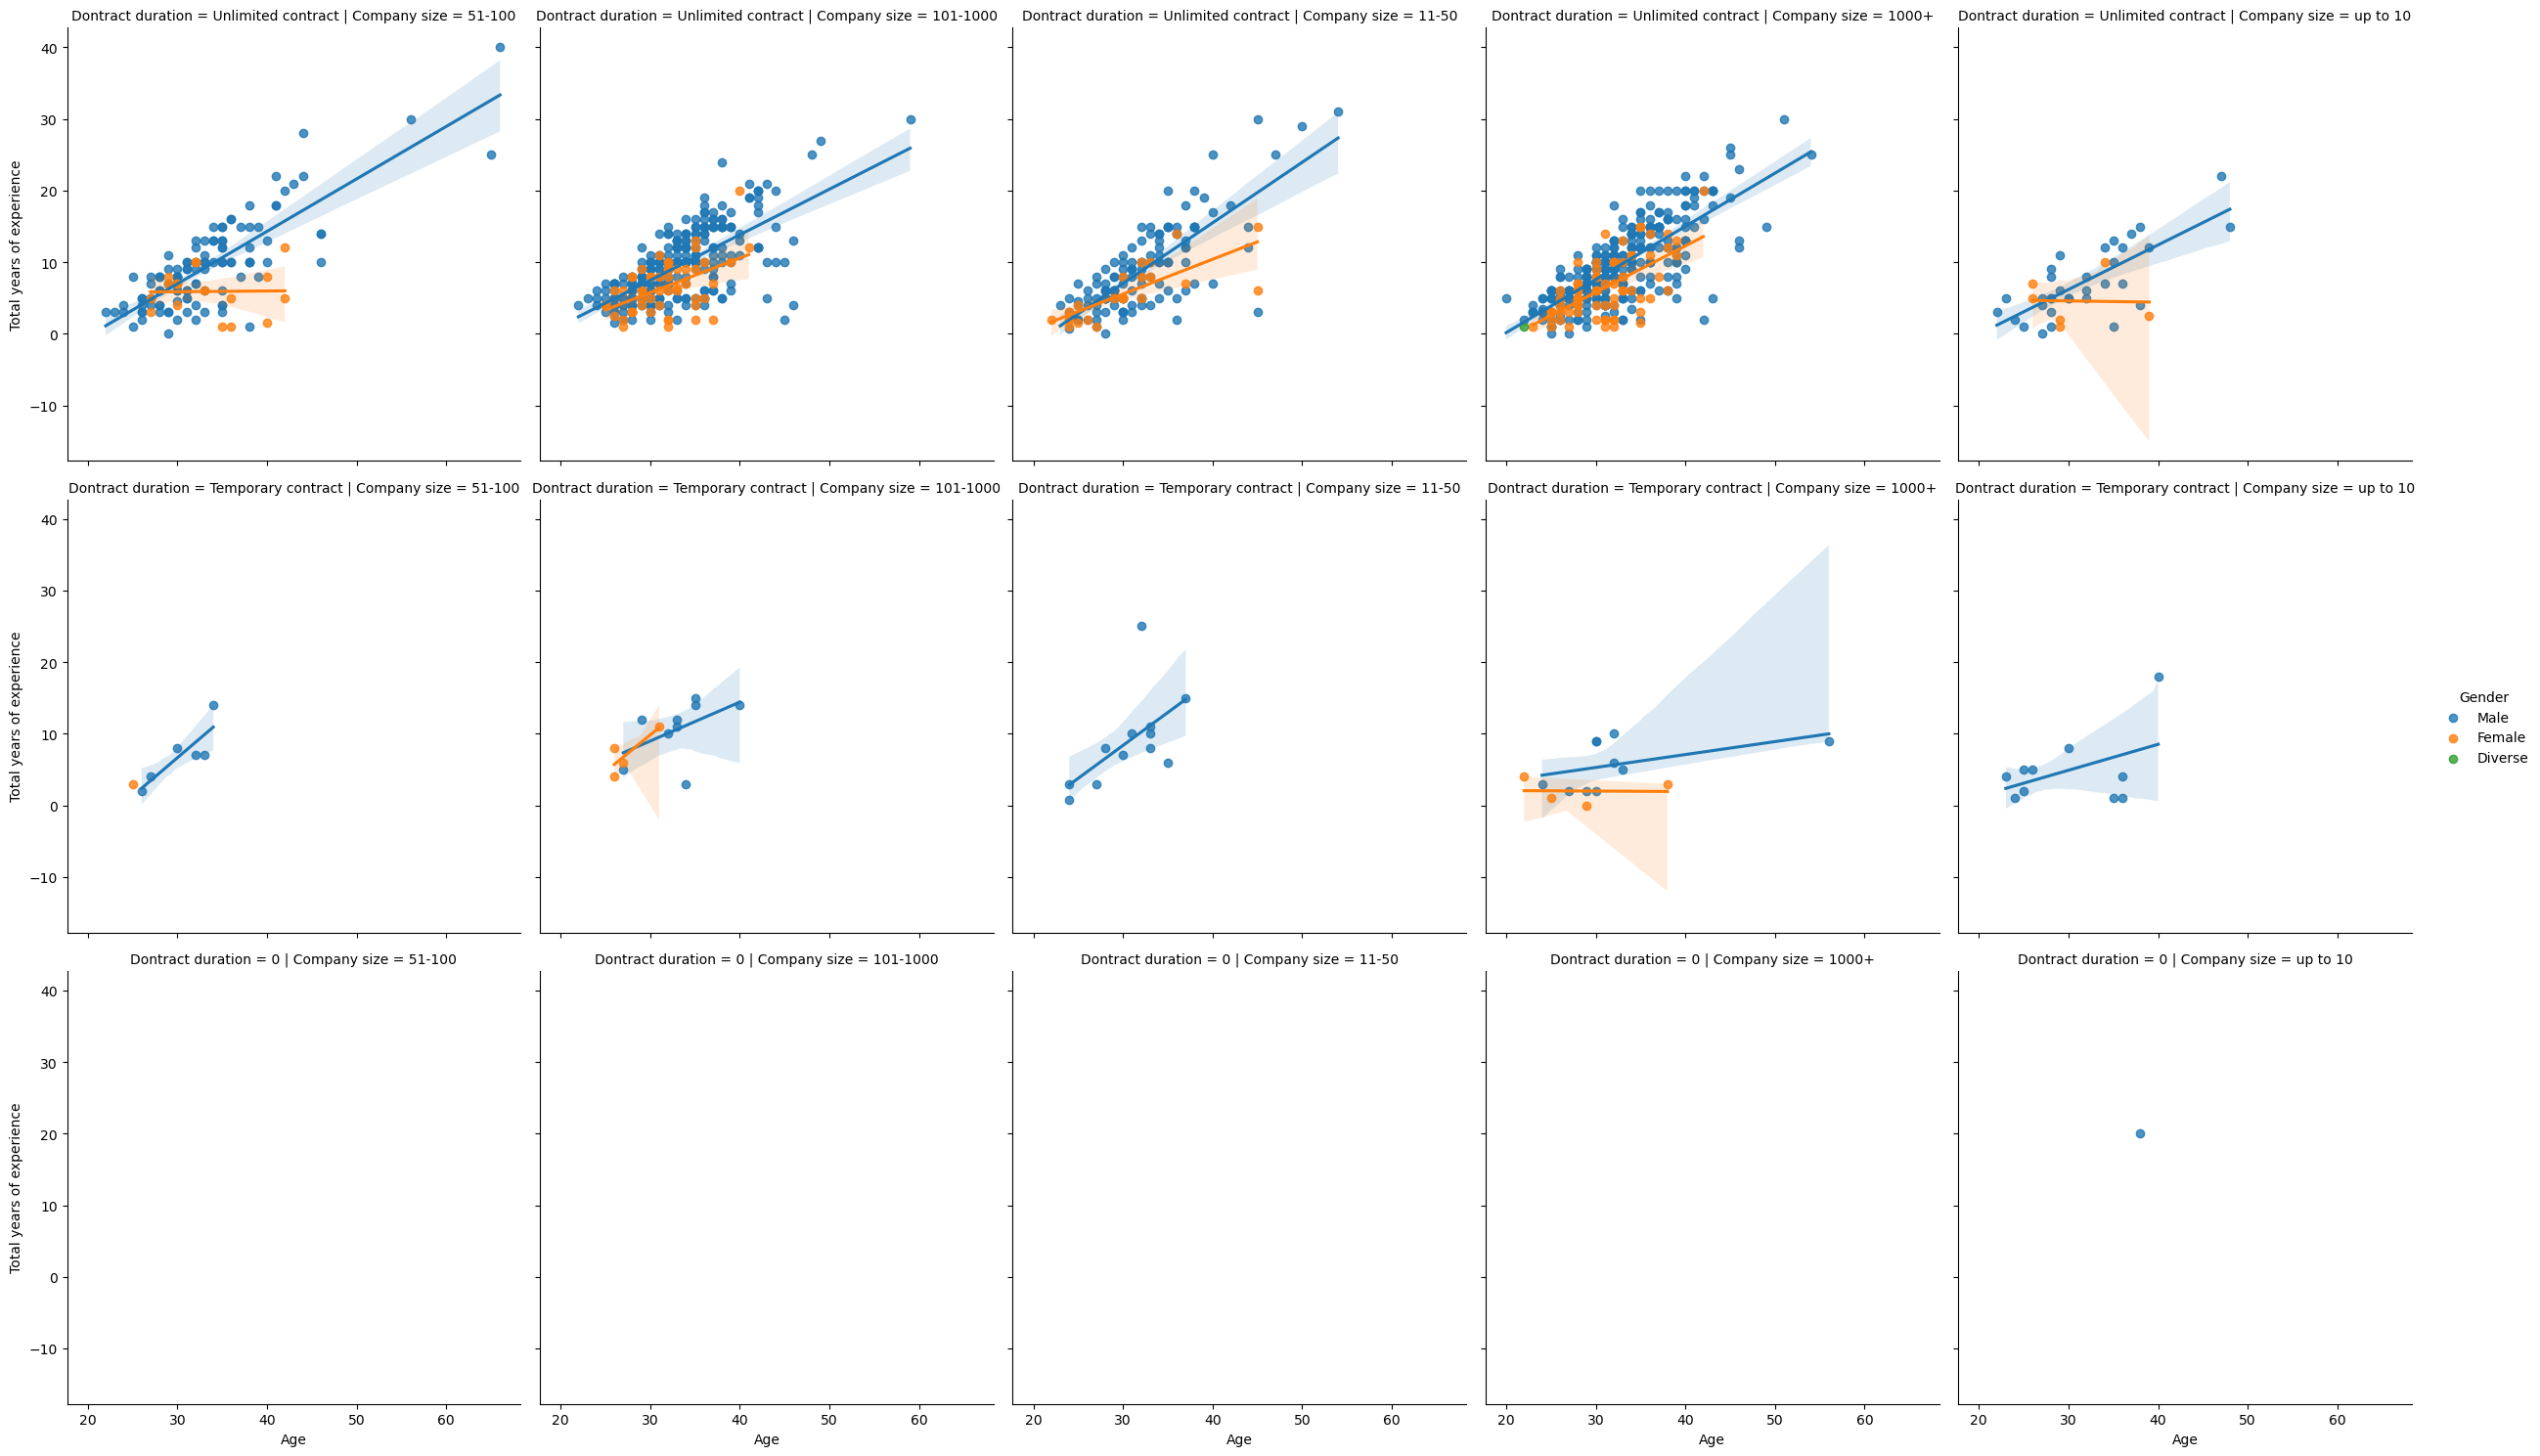

In [111]:
# row and column 

sns.lmplot(income,x ='Age',y='Total years of experience', hue = 'Gender',row = 'Dontract duration' ,col= 'Company size', fit_reg=True)
plt.plot()

In [112]:

income.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26,Male,Munich,Software Engineer,5.0,Senior,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26,Male,Berlin,Backend Developer,7.0,Senior,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29,Male,Berlin,Software Engineer,12.0,Lead,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37,Male,Berlin,Backend Developer,17.0,Senior,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


## Ques

plot Age and gender wise salary for each seniority level group


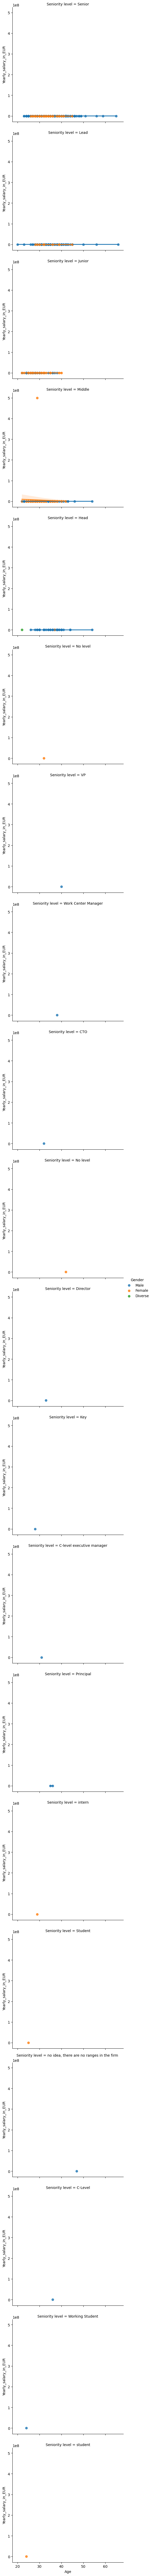

In [113]:




# row and column 
sns.lmplot(income,x ='Age',y='Yearly_salary_in_EUR', hue = 'Gender',row = 'Seniority level' , fit_reg=True)
plt.show()


## Subplots

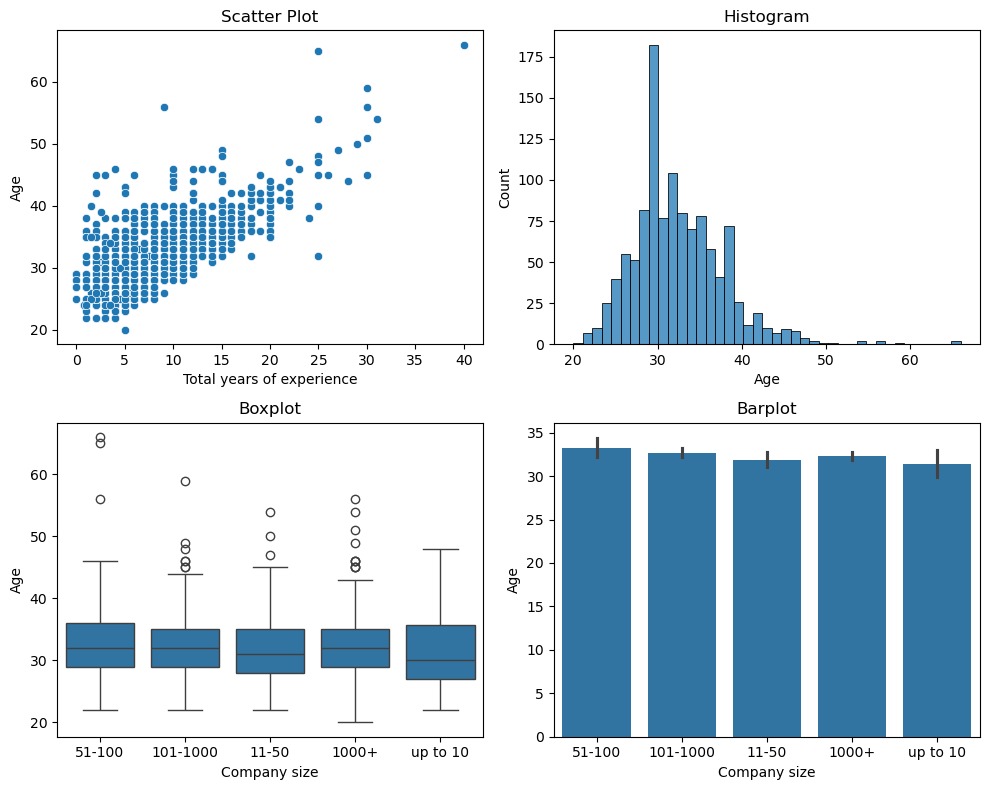

In [115]:


# Create a figure and an array of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # here 2,2 is graph matrix, total graphs will be 2X2 = 4

# Using seaborn to create different plots on each subplot
sns.scatterplot(x='Total years of experience', y='Age', data=income, ax=axes[0, 0])
sns.histplot(data=income['Age'], ax=axes[0, 1])
sns.boxplot(x='Company size', y='Age', data=income, ax=axes[1, 0])
sns.barplot(x='Company size', y='Age', data=income, ax=axes[1, 1])



# Add titles to each subplot
axes[0, 0].set_title('Scatter Plot')
axes[0, 1].set_title('Histogram')
axes[1, 0].set_title('Boxplot')
axes[1, 1].set_title('Barplot')







# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


<br> We create a figure with 2 rows and 2 columns of subplots using ```plt.subplots(2, 2)```
<br> We then pass each subplot ```(axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1])``` to the ax parameter of Seaborn plotting functions to specify where each plot should be drawn.

<br> ```fig``` You can think of it as the canvas on which you'll draw your plots.

### rotating xlabel

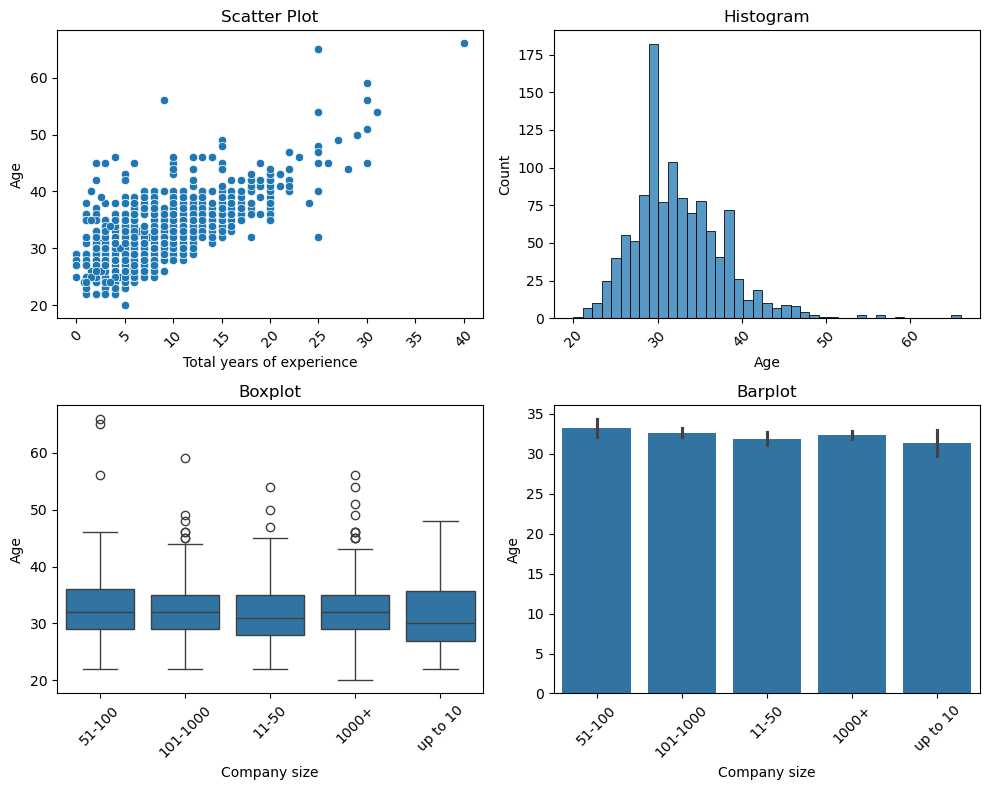

In [118]:


# Create a figure and an array of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Using seaborn to create different plots on each subplot
sns.scatterplot(x='Total years of experience', y='Age', data=income, ax=axes[0, 0])
sns.histplot(data=income['Age'], ax=axes[0, 1])
sns.boxplot(x='Company size', y='Age', data=income, ax=axes[1, 0])
sns.barplot(x='Company size', y='Age', data=income, ax=axes[1, 1])



# Add titles to each subplot
axes[0, 0].set_title('Scatter Plot')
axes[0, 1].set_title('Histogram')
axes[1, 0].set_title('Boxplot')
axes[1, 1].set_title('Barplot')



axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 1].tick_params(axis='x', rotation=45)



# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [98]:
# Another method to rotate labels to 45 degree

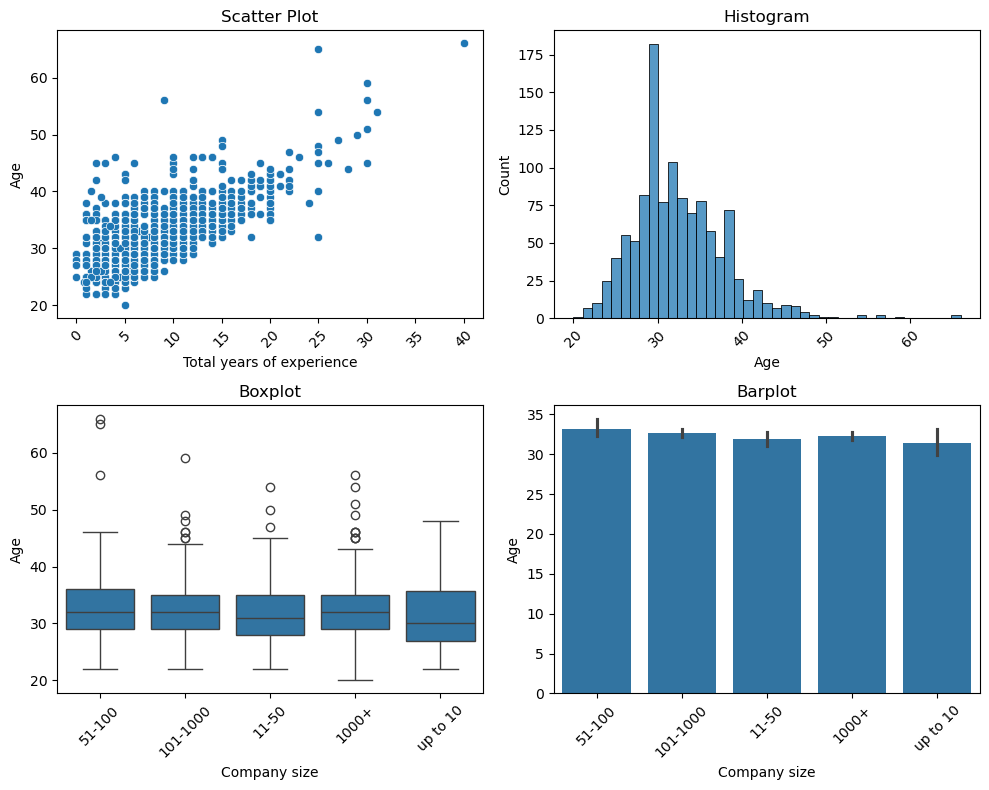

In [119]:


# Create a figure and an array of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Using seaborn to create different plots on each subplot
sns.scatterplot(x='Total years of experience', y='Age', data=income, ax=axes[0, 0])
sns.histplot(data=income['Age'], ax=axes[0, 1])
sns.boxplot(x='Company size', y='Age', data=income, ax=axes[1, 0])
sns.barplot(x='Company size', y='Age', data=income, ax=axes[1, 1])


# Add titles to each subplot
axes[0, 0].set_title('Scatter Plot')
axes[0, 1].set_title('Histogram')
axes[1, 0].set_title('Boxplot')
axes[1, 1].set_title('Barplot')

#Rotating xlabels
for ax in axes.flatten():
   for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)





# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [120]:
income.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly_salary_in_EUR,Number of vacation days,Employment status,Dontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26,Male,Munich,Software Engineer,5.0,Senior,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26,Male,Berlin,Backend Developer,7.0,Senior,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29,Male,Berlin,Software Engineer,12.0,Lead,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37,Male,Berlin,Backend Developer,17.0,Senior,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


## Facetgrids

FacetGrid allows us to create a grid of subplots based on the unique values of one or more categorical variables in your dataset. Each subplot in the grid represents a subset of the data based on the categories of the variables you specify. This is useful for visualizing relationships between variables across different subsets of the data.

In [42]:
import seaborn as sns

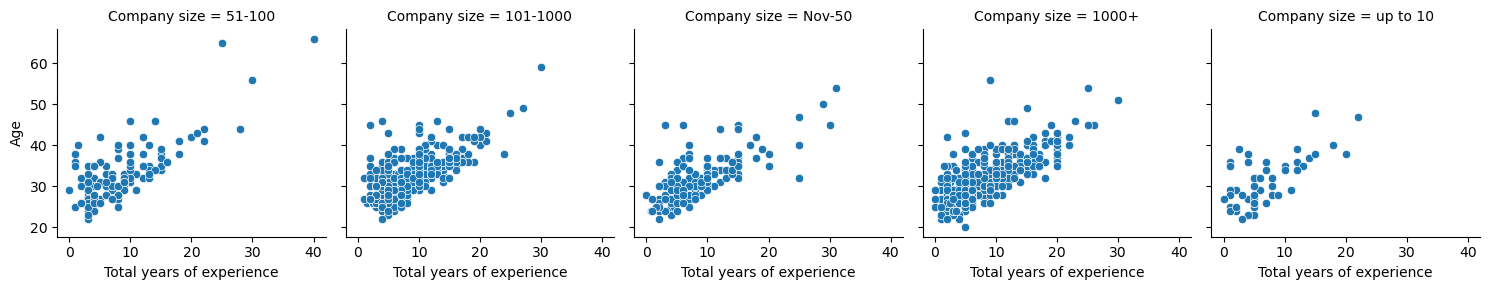

In [42]:



# Using FacetGrid
g = sns.FacetGrid(income, col="Company size") 

# it will map visualization function (scatterplot) to each category of company size
g.map(sns.scatterplot, 'Total years of experience', "Age") 
plt.show()


```sns.FacetGrid()``` creates an empty grid of subplots.
<br> specify the categorical variable "category_variable" using the col parameter. This tells Seaborn to create a subplot for each unique value of "category_variable".
<br> ```g.map()``` is used to map each subplot to a plotting function (sns.scatterplot in this case) and specify which variables to plot ('Total years of experience'and 'Age').


### can specify row and column both

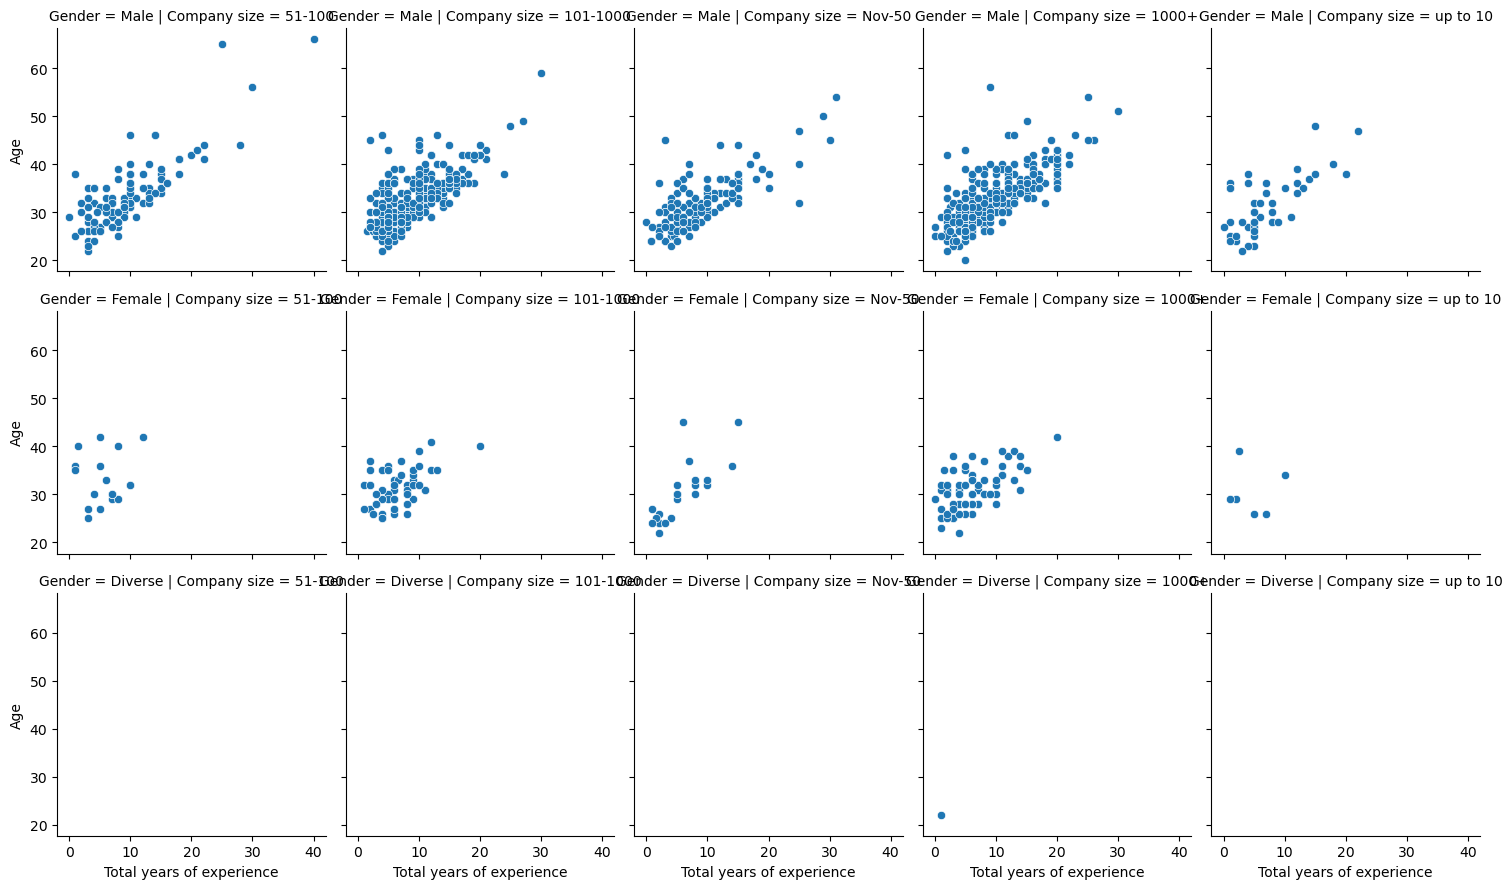

In [43]:




# Using FacetGrid
g = sns.FacetGrid(income, col="Company size", row = "Gender")

# it will map visualization function (scatterplot) to each category of company size
g.map(sns.scatterplot, 'Total years of experience', "Age") 
plt.show()


## Ques


create a  for Age and total years of experience. create multiple graphs based on company size and contract duration

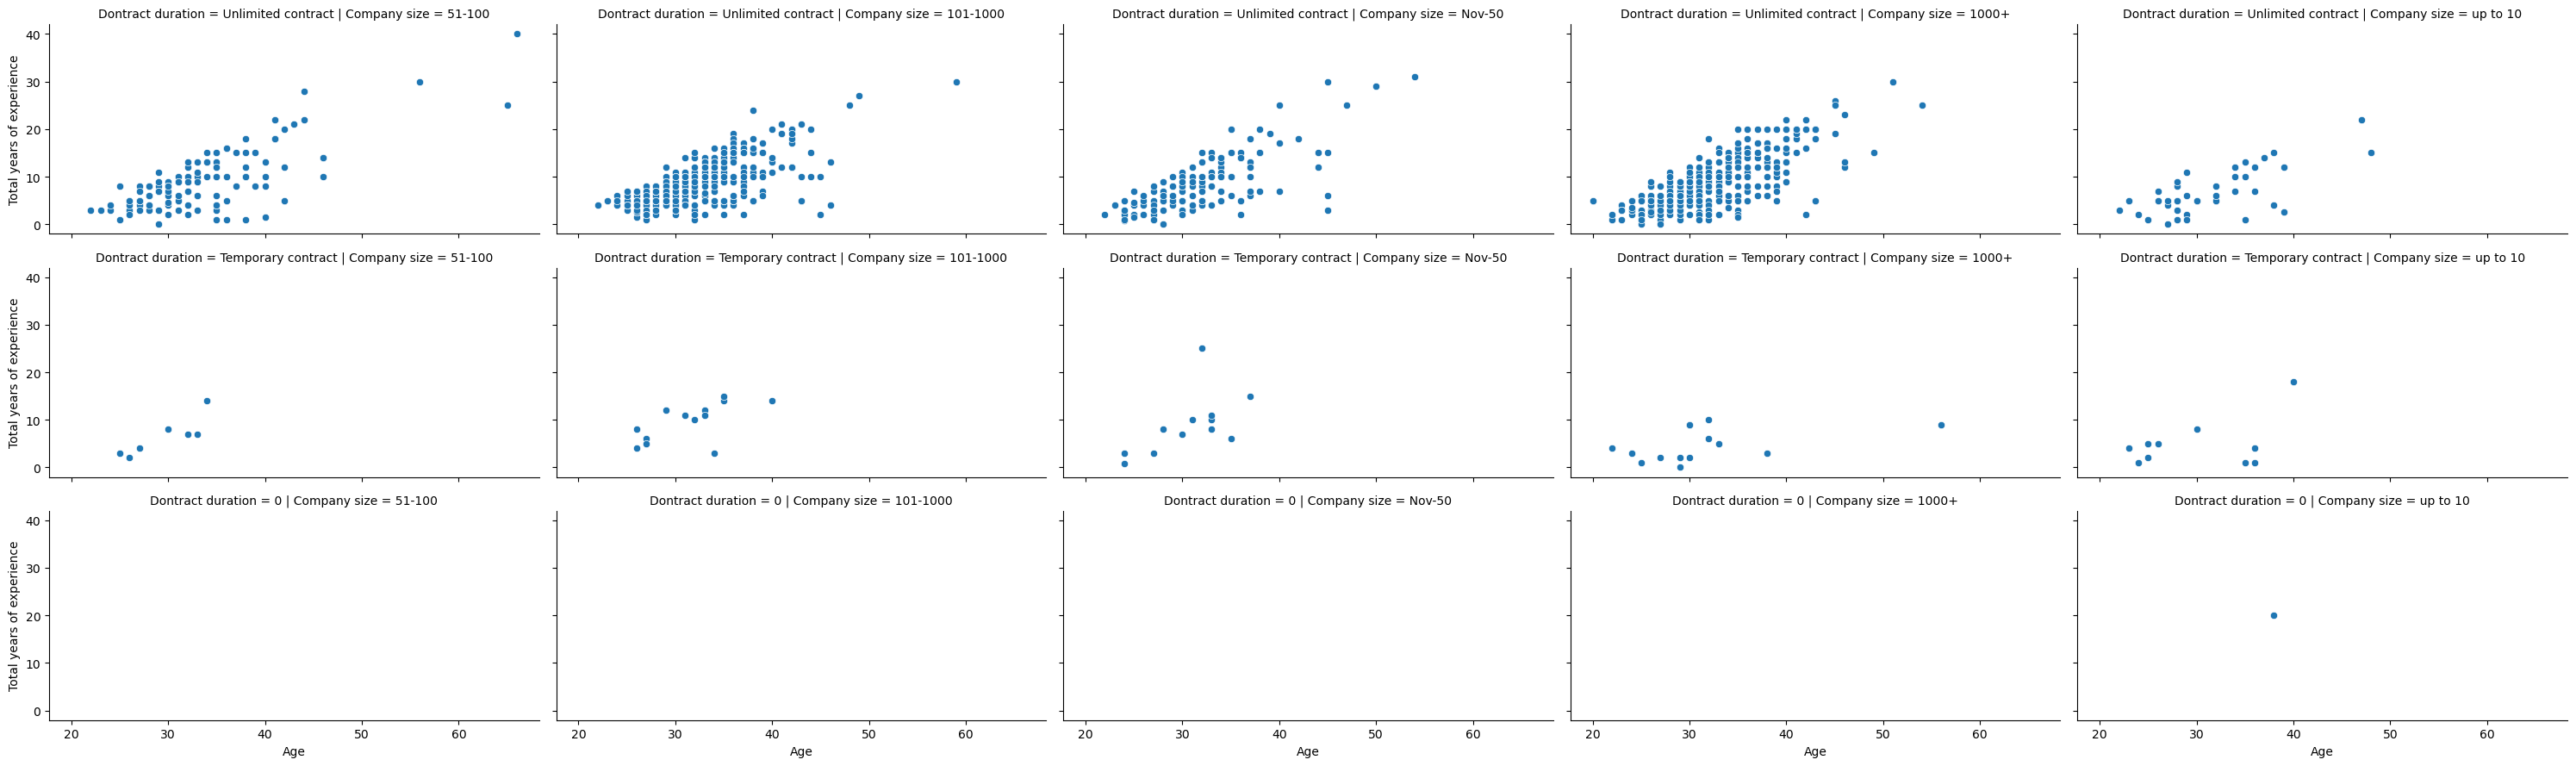

In [113]:







# Using FacetGrid
g = sns.FacetGrid(income, col="Company size", row = "Dontract duration", height= 3, aspect = 2)

# height and aspect are important parameter to define figure size of graphs 

# it will map visualization function (scatterplot) to each category of company size
g.map(sns.scatterplot, "Age", 'Total years of experience' ) 


plt.tight_layout()
plt.show()


### How to save visualization



```plt.savefig('name_of_file.png')```

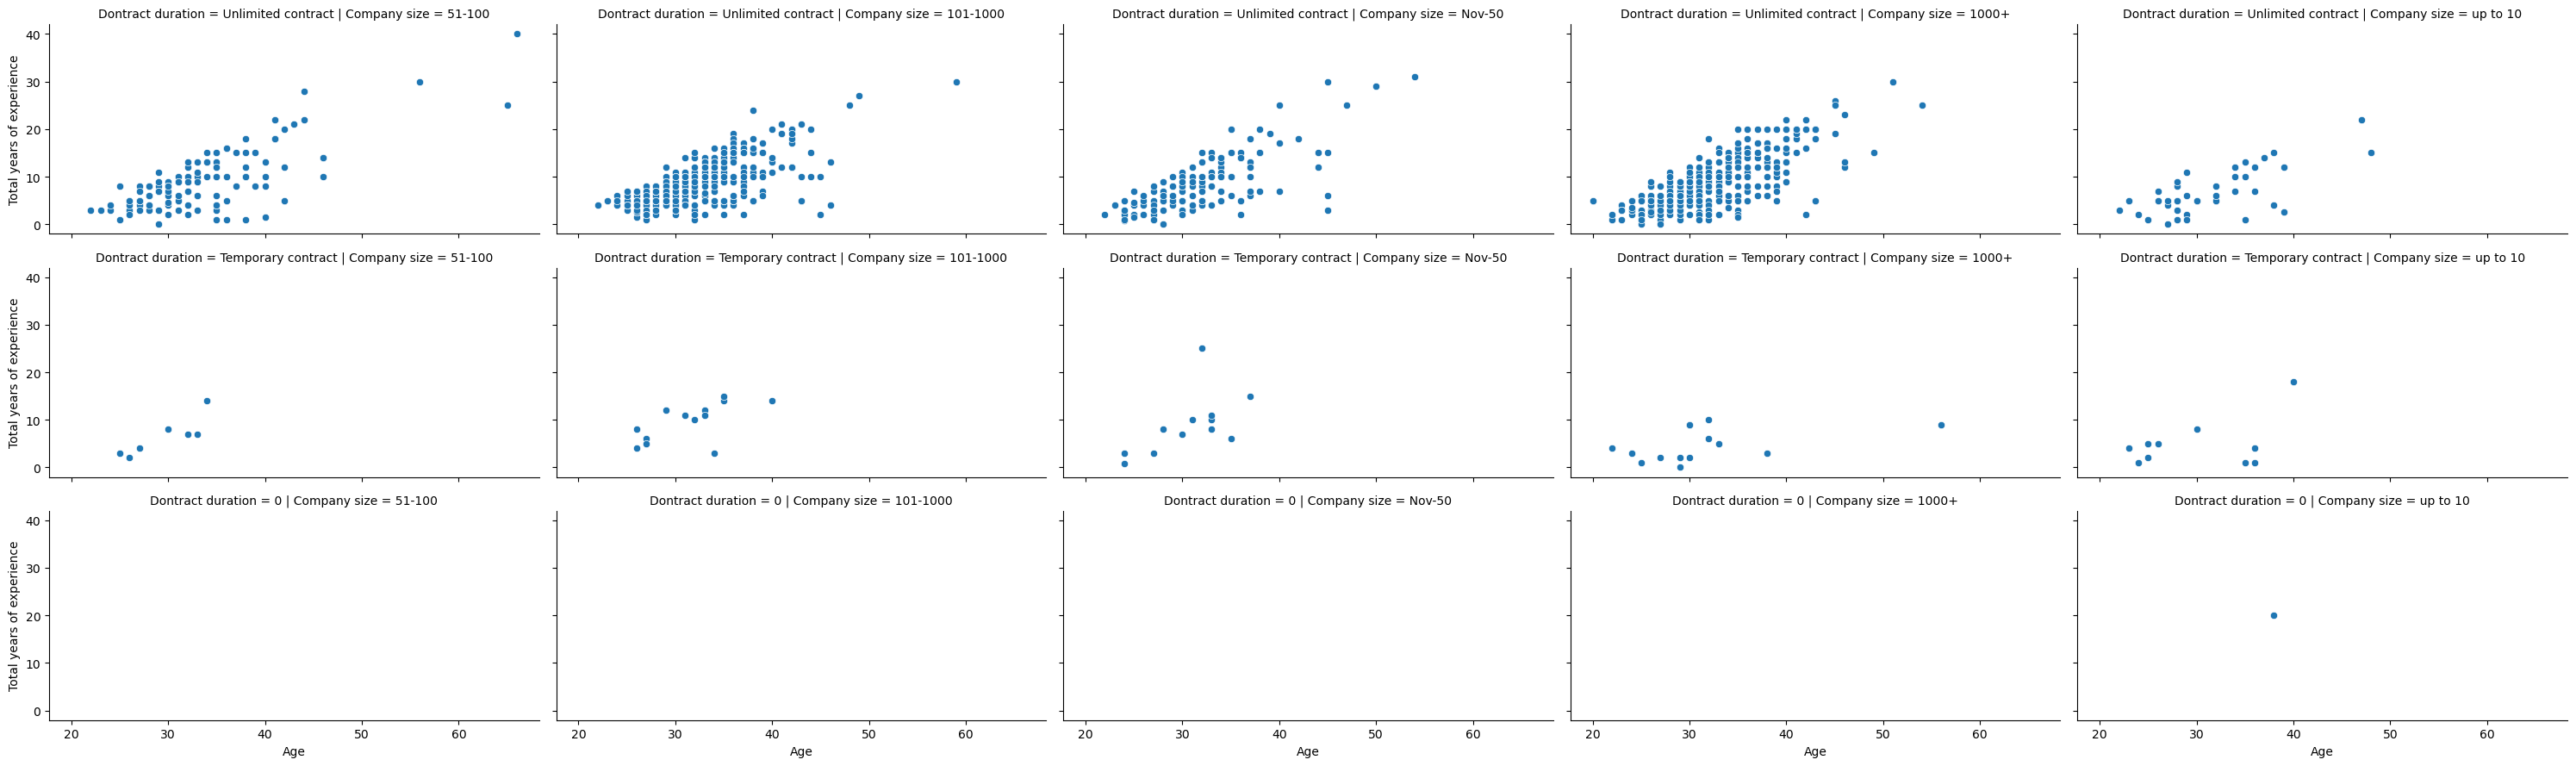

In [114]:

# Using FacetGrid
g = sns.FacetGrid(income, col="Company size", row = "Dontract duration", height= 3, aspect = 2)

# height and aspect are important parameter to define figure size of graphs 

# it will map visualization function (scatterplot) to each category of company size
g.map(sns.scatterplot, "Age", 'Total years of experience' ) 


plt.tight_layout()
plt.savefig('facetgrid.png')
plt.show()
